# Topics In Deep Learning Project 2019

### Team :
Abhishek Saseendran - 01FB16ECS018 

Abhinav Hegde

Madan

### Project Discription : 
Implementing a Bidirectional RNN with LSTM cell, to classify handrawn images.

Data set obtained from "Google Quick Draw Dataset" - https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bit

### Code

In [1]:
from   __future__         import print_function
from   tensorflow.contrib import rnn
from   PIL                import Image,ImageDraw
from   PIL                import ImageFilter
import numpy as np
import os 
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import tkinter as tk
import PIL

Reading image data from : 
eye.npy
line.npy
square.npy
star.npy
tower.npy
tree.npy
Class Dictionary : 
{0: 'eye', 1: 'line', 2: 'square', 3: 'star', 4: 'tower', 5: 'tree'}


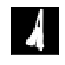

[0, 0, 0, 0, 1, 0]


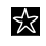

[0, 0, 0, 1, 0, 0]


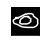

[1, 0, 0, 0, 0, 0]


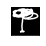

[0, 0, 0, 0, 0, 1]


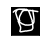

[0, 0, 1, 0, 0, 0]


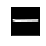

[0, 1, 0, 0, 0, 0]


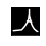

[0, 0, 0, 0, 1, 0]


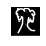

[0, 0, 0, 0, 0, 1]


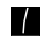

[0, 1, 0, 0, 0, 0]


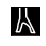

[0, 0, 0, 0, 1, 0]


In [2]:
#Reading the dataset 

num_classes  = 6 #number of image (.npy) files 

train_length = num_classes*100000   
test_length  = num_classes*10000


x_train =[]
y_train =[]
x_test = []
y_test = []

class_dictionary ={} #will conatin the mapping of class names and their indicies 

path = 'data/'
dictionary_index = 0

print("Reading image data from : ")
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.npy' in file:
            print(file)
            class_dictionary[dictionary_index] = file.split('.')[0]
            dictionary_index += 1
            data = np.load(path+file)
            x_train.extend(data[:100000])
            x_test.extend(data[100000:110000])
            
print("Class Dictionary : ")
print(class_dictionary)
#labeling the data
index = 0
for i in range (train_length):
    if(i%100000 == 0):
        one_hot_encoding = [0 for i in range(num_classes)]
        one_hot_encoding[index] = 1
        index = index + 1
        #print(one_hot_encoding)
    y_train.extend([one_hot_encoding])
    
index = 0
for i in range (test_length):
    if(i%10000 == 0):
        one_hot_encoding = [0 for i in range(num_classes)]
        one_hot_encoding[index] = 1
        index = index + 1
        #print(one_hot_encoding)
    y_test.extend([one_hot_encoding])

#shuffle for nromalisation
seed = 4
random.Random(seed).shuffle(x_train)
random.Random(seed).shuffle(y_train)
random.Random(seed).shuffle(x_test)
random.Random(seed).shuffle(y_test)
    
    
#plot some of the images 
plt.figure(figsize=(10, 4))

for i in range(10):
    # display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()
    print(y_train[i])


#store as numpy arary 
x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [3]:
#Network Architecture

learning_rate  = 0.01
training_steps = 10000
batch_size     = 128
display_step   = 200 #display loss and accuracy per display_step


num_input  = 28 # (img shape: 28*28)
timesteps  = 28 # timesteps (?)
num_hidden = 200 # hidden layer num of features


X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Hidden layer weights => 2*n_hidden because of forward + backward cells
weights = tf.Variable(tf.random_normal([2*num_hidden, num_classes])) 
 
biases =  tf.Variable(tf.random_normal([num_classes]))


def BiRNN(x, weights, biases):
    
    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, num_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, num_input)
    x = tf.unstack(x, timesteps, 1)


    # Forward direction cell
    lstm_fw_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0) 
    #add starting bias to the forget gate so it reduces num of states dropped
    
    # Backward direction cell
    lstm_bw_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, _, _ = rnn.static_bidirectional_rnn(lstm_fw_cell, lstm_bw_cell, x,dtype=tf.float32)
    
    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights) + biases


logits     = BiRNN(X, weights, biases)
prediction = tf.nn.softmax(logits)

# softmax + cross entropy loss function used 
loss_op   = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op  = optimizer.minimize(loss_op)

# Evaluate model 
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))   
accuracy     = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables 
init = tf.global_variables_initializer()

W1127 02:16:53.045368  6920 deprecation.py:323] From <ipython-input-3-73b6020b37ba>:34: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W1127 02:16:53.058967  6920 deprecation.py:323] From <ipython-input-3-73b6020b37ba>:41: static_bidirectional_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell, unroll=True))`, which is equivalent to this API
W1127 02:16:53.062969  6920 deprecation.py:323] From C:\Users\jedib\Anaconda3\lib\site-packages\tensorflow\python\ops\rnn.py:1610: static_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivale

In [4]:
#Training 

with tf.Session() as sess:
    
    sess.run(init)
    saver = tf.train.Saver(save_relative_paths=True)
    index = 0
    for step in range(1, training_steps+1):
        if(index + batch_size > train_length):
            break

        batch_x = x_train[index:index+batch_size]
        batch_y = y_train[index:index+batch_size]
        index = index + batch_size
        
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, timesteps, num_input))
        #print(index)

        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    #Test against test data set 
    test_data  = x_test.reshape((-1, timesteps, num_input))
    test_label = y_test
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))
    
    saver.save(sess, 'my_test_model')
    #saving the weights and bias  

Step 1, Minibatch Loss= 2.3599, Training Accuracy= 0.375
Step 200, Minibatch Loss= 0.4004, Training Accuracy= 0.898
Step 400, Minibatch Loss= 0.1856, Training Accuracy= 0.961
Step 600, Minibatch Loss= 0.2570, Training Accuracy= 0.898
Step 800, Minibatch Loss= 0.2754, Training Accuracy= 0.953
Step 1000, Minibatch Loss= 0.1903, Training Accuracy= 0.953
Step 1200, Minibatch Loss= 0.1518, Training Accuracy= 0.961
Step 1400, Minibatch Loss= 0.2015, Training Accuracy= 0.938
Step 1600, Minibatch Loss= 0.0964, Training Accuracy= 0.977
Step 1800, Minibatch Loss= 0.1899, Training Accuracy= 0.945
Step 2000, Minibatch Loss= 0.1580, Training Accuracy= 0.953
Step 2200, Minibatch Loss= 0.1516, Training Accuracy= 0.953
Step 2400, Minibatch Loss= 0.1036, Training Accuracy= 0.984
Step 2600, Minibatch Loss= 0.1329, Training Accuracy= 0.977
Step 2800, Minibatch Loss= 0.0915, Training Accuracy= 0.977
Step 3000, Minibatch Loss= 0.2344, Training Accuracy= 0.953
Step 3200, Minibatch Loss= 0.1341, Training Acc

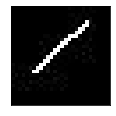

[1]


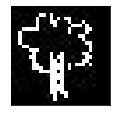

[5]


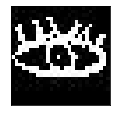

[0]


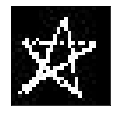

[3]


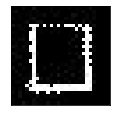

[2]


In [6]:
#Test the model with live inputs 

with tf.Session() as sess:
    
    #restore the weights and bias 
    new_saver = tf.train.import_meta_graph('my_test_model.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    #using tkinter for generating the GUI to draw
    class ImageGenerator:
        def __init__(self,parent,posx,posy,*kwargs):
            self.ans = tk.StringVar()
            self.ans.set("")
            self.parent = parent
            self.posx   = posx
            self.posy   = posy
            self.sizex  = 300
            self.sizey  = 300
            self.b1     = "up"
            self.xold   = None
            self.yold   = None 
            self.drawing_area=tk.Canvas(self.parent,width=self.sizex,height=self.sizey,bg='black')
            self.drawing_area.place(x=self.posx,y=self.posy)
            self.drawing_area.bind("<Motion>", self.motion)
            self.drawing_area.bind("<ButtonPress-1>", self.b1down)
            self.drawing_area.bind("<ButtonRelease-1>", self.b1up)
            self.button=tk.Button(self.parent,text="Done!",width=10,bg='white',command=self.save)
            self.button.place(x=self.sizex/7,y=self.sizey+20)
            self.button1=tk.Button(self.parent,text="Clear!",width=10,bg='white',command=self.clear)
            self.button1.place(x=(self.sizex/7)+80,y=self.sizey+20)
    
            self.label = tk.Label(self.parent, textvariable= self.ans)
            self.label.place(x=(self.sizex/7)+300,y=100)
    
            self.image=Image.new("RGB",(300,300),(0,0,0))
            self.draw=ImageDraw.Draw(self.image)

        def save(self):
            filename = "temp.jpg"
            self.image.save(filename)

            baseheight = 28
            img = Image.open("temp.jpg")
            #dilation 
            img = img.filter(ImageFilter.MaxFilter(3))
            #resize image into 28x28
            hpercent = (baseheight / float(img.size[1]))
            wsize = int((float(img.size[0]) * float(hpercent)))
            img = img.resize((wsize, baseheight), PIL.Image.ANTIALIAS)
            #making it compeletely black and white 
            img = img.convert('1')
            img.save("resized_image.jpg")
  
            img = Image.open("resized_image.jpg")
            arr = np.array(img)

            #print(len(arr))
            
            plt.figure(figsize=(10, 4))

            for i in range(1):
                # display original
                ax = plt.subplot(2, 1, i + 1)
                plt.imshow(arr)
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
            plt.show()
            
            arr = arr.reshape((-1,28, 28))
            res = sess.run(tf.argmax(prediction, 1), feed_dict={X: arr})
            print(res)
            self.ans.set(class_dictionary[res[0]]) # this will set the text in the GUI
            
        def clear(self):
            self.drawing_area.delete("all")
            self.image=Image.new("RGB",(300,300),(0,0,0))
            self.draw=ImageDraw.Draw(self.image)

        def b1down(self,event):
            self.b1 = "down"

        def b1up(self,event):
            self.b1 = "up"
            self.xold = None
            self.yold = None

        def motion(self,event):
            if self.b1 == "down":
                if self.xold is not None and self.yold is not None:
                    event.widget.create_line(self.xold,self.yold,event.x,event.y,smooth='true',width=10,fill='white')
                    self.draw.line(((self.xold,self.yold),(event.x,event.y)),(255,255,255),width=3)

            self.xold = event.x
            self.yold = event.y

    if __name__ == "__main__":
        root=tk.Tk()
        root.wm_geometry("%dx%d+%d+%d" % (400, 400, 10, 10))
        root.config(bg='white')
        ImageGenerator(root,10,10)
        root.mainloop()